In [ ]:
pip install matplotlib

In [ ]:
pip install pandas

In [9]:
import torch
import os
import pandas as pd
from torch.utils.data import Dataset
from torchvision.io import read_image
import matplotlib.pyplot as plt

In [ ]:
''' 
Import Dependancies
Load Custom Dataset
'''

In [23]:
import os
import pandas as pd
import torch
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [30]:
class CaptchaDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None):
        self.labels = pd.read_csv(annotations_file)  
        self.img_dir = img_dir 
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.labels.iloc[idx, 0])  
        image = read_image(img_path).float() / 255.0  
        label = self.labels.iloc[idx, 1]  
        if self.transform:
            image = self.transform(image)
        return image, label

train_dataset = CaptchaDataset(
    r"C:\Users\zacha\Desktop\Cyber Capstone\CyberCapstone\Captcha Generator\dataset\captcha_labels.csv", 
    r"C:\Users\zacha\Desktop\Cyber Capstone\CyberCapstone\Captcha Generator\dataset\images"
)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

print("Dataset loaded")


Dataset loaded


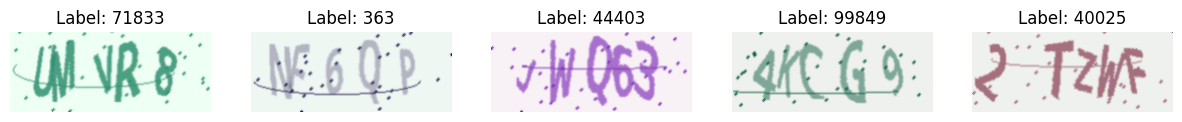

In [36]:
def show_captcha_samples(dataset, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

    for i in range(num_samples):
        image, label = dataset[i]  
        
        image = image.permute(1, 2, 0).numpy()  
        
        if image.shape[-1] == 3:
            axes[i].imshow(image)
        else:  # If grayscale, remove the last dimension
            axes[i].imshow(image.squeeze(), cmap="gray")
        
        axes[i].set_title(f"Label: {label}")
        axes[i].axis("off")

    plt.show()

show_captcha_samples(train_dataset)
